In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# **Best Neighborhood Project**

## **Introduction**

As a team, our goal for the Final Project was to determine the best neighborhood in Pittsburgh using typical **Quality of Life** metrics.

In a city, there are many factors that may be overlooked, but are crucial to an individuals quality of life. For example, if a city was riddled with crime, it may not foster a comforting, "home-y" feeling. As a group, we felt that the idea of quality of life was the most decisive factor in a good neighborhood.

We approached the creation of an all-encompassing quality of life metric by first choosing statistics/details that may indicate a person's quality of life in any given city (e.g., poverty rate, police incidents, park acreage). We visualized these submetrics to get an accurate representation of which city in Pittsburgh performed the best in each respective category.

In order to combine these submetrics into a single **Quality of Life** metric, we deliberated on which of the submetrics may be the most impactful in the quality of life of individuals. We discussed many alternative weights, and occasionally held different views on which submetrics held importance over others (e.g., whether an impoverished community or a crime-filled community would lead to lower quality of life), but we ultimately settled on a hierarchy of factors that contribute to quality of life, most-to-least: poverty status, police incidents, median home value, park acres, and playgrounds per city.

## **Metric**

As alluded to above, our metric is the overall **Quality of Life** for individuals living in different Pittsburgh neigherhoods. In determining this, we are measuring poverty status, police incidents, median home value, park acres, and playgrounds per city.

Here are the datasets we are using:

- [Poverty Status](https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2014-miscellaneous-data/resource/7996d143-c155-466e-8414-115f74997dd7)
- [Police Incidents](https://data.wprdc.org/dataset/uniform-crime-reporting-data)
- Median Home Value + Park Acres - [Neighborhood Data](https://data.wprdc.org/dataset/neighborhoods2)
- [Playgrounds](https://data.wprdc.org/dataset/playgrounds)


### **Submetrics**

#### **James - Neighborhood Data**

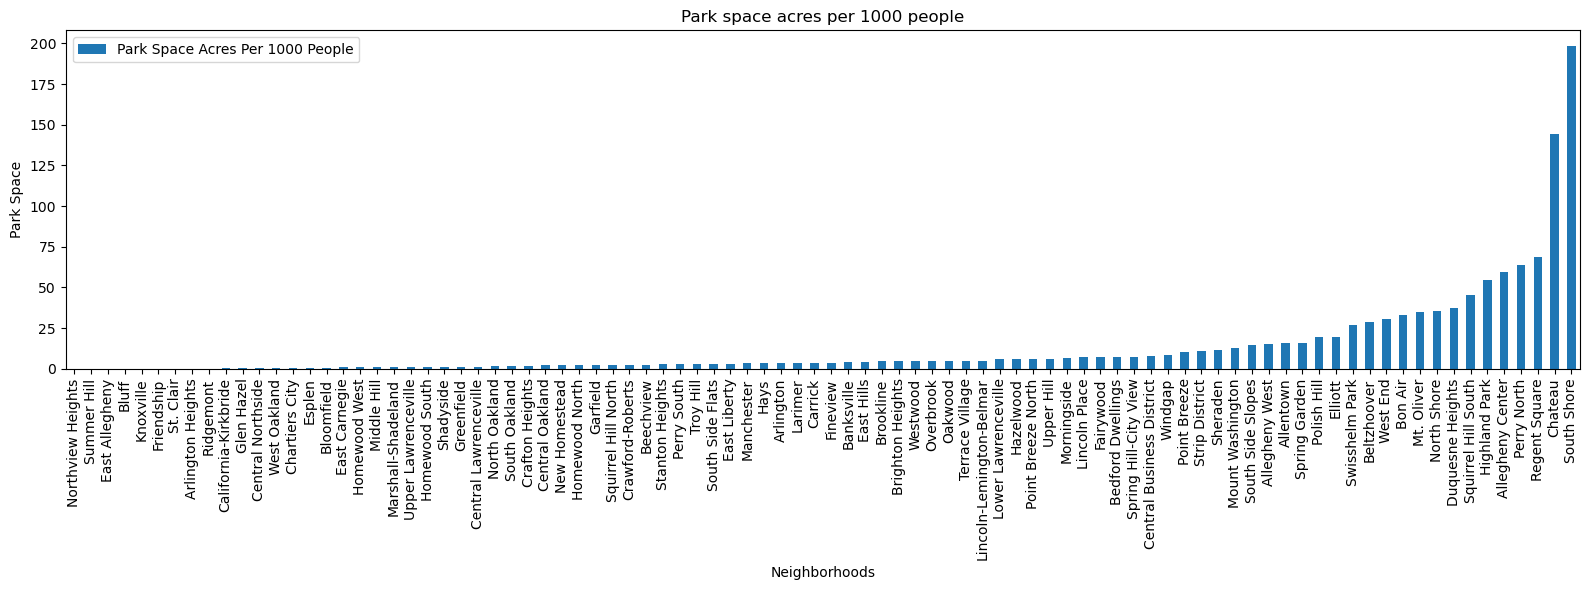

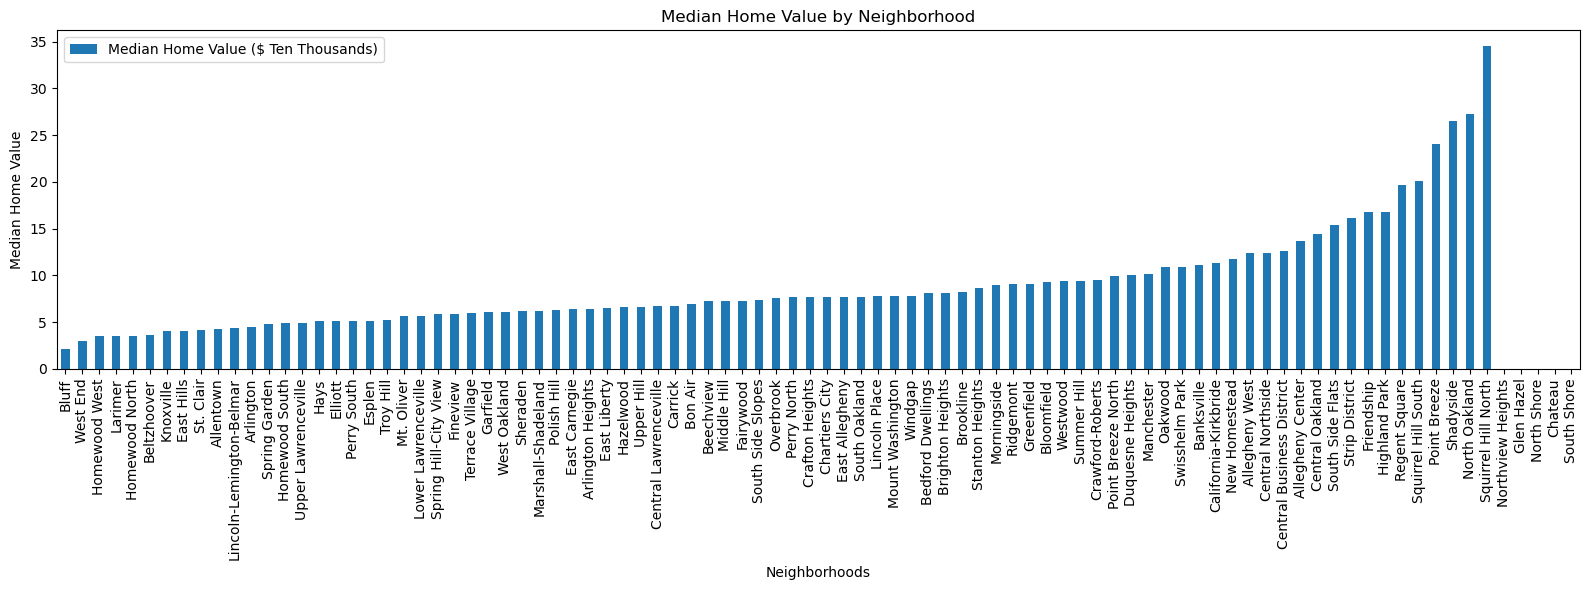

In [4]:
df = pd.read_csv("datasets/neighborhoodData.csv")
df = df[["Median Home Value ($ Ten Thousands)", "Neighborhood_2010_HOOD", "Park Space Acres Per 1000 People"]]
df["Median Home Value ($ Ten Thousands)"]=df["Median Home Value ($ Ten Thousands)"].replace('[\$,]', '', regex=True).astype(float)
df["Median Home Value ($ Ten Thousands)"]=df["Median Home Value ($ Ten Thousands)"].divide(10000)
df=df.sort_values(by="Park Space Acres Per 1000 People")
james1=df#.dropna(subset="Park Space Acres Per 1000 People")
james1.plot(
    kind="bar",
    x="Neighborhood_2010_HOOD",
    y=["Park Space Acres Per 1000 People"], 
    title="Park space acres per 1000 people",
    figsize=(16,6)
)
plt.xlabel("Neighborhoods")
plt.ylabel("Park Space")
plt.tight_layout()
plt.show()
james2=df#.dropna(subset="Median Home Value ($ Ten Thousands)")
james2=james2.sort_values(by="Median Home Value ($ Ten Thousands)")
james2.plot(
    kind="bar",
    x="Neighborhood_2010_HOOD",
    y="Median Home Value ($ Ten Thousands)",
    title = "Median Home Value by Neighborhood",
    figsize=(16,6)
)
plt.xlabel("Neighborhoods")
plt.ylabel("Median Home Value")
plt.tight_layout()
plt.show()

Two submetrics were analyzed here, so a best neighborhood will be determined for each of them.

For the **park acres** submetric, the best neighborhood is **South Shore** because it has the most park acres per 1000 people. Park acres create crucial recreational areas that are shown to improve quality of life, but the number of people is taken into account because a park is less beneficial if it is overcrowded.

For the **median home value** submetric, the best neighborhood is **Squirrel Hill North** because it has the highest median home value. Home value is a result of a number of factors, most notably the location of the house. Therefore we can determine that because this neighborhood has the highest median home value it is likely in a desireable location.

#### **Ethan - Police Incidents**

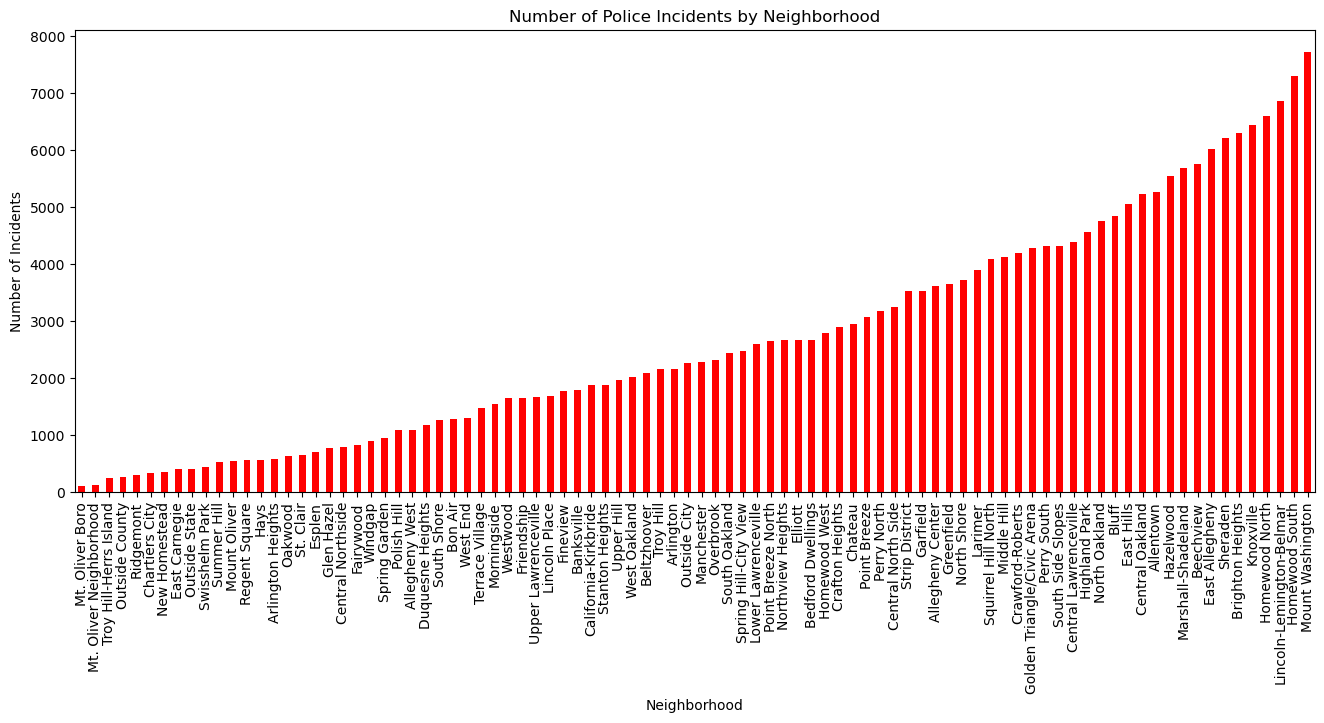

In [5]:
df = pd.read_csv("datasets/police_incidents.csv")
counts = df["INCIDENTNEIGHBORHOOD"].value_counts().nsmallest(90).sort_values()
ethan = counts
ethan=ethan.to_frame("Incidents")
counts.plot.bar(
    figsize=(16, 6), 
    title="Number of Police Incidents by Neighborhood",
    xlabel="Neighborhood",
    ylabel ="Number of Incidents",
    rot=90,
    color="red"
)
plt.show()

Based on this metric, the best neighborhood is **Mt. Oliver Boro** due to having the least number of police incidents out of all neighborhoods. The number of police incidents is extremely important in determining the best neighborhood as safety is a crucial factor in determining the quality of life in an area.

#### **Sam M - Playgrounds**

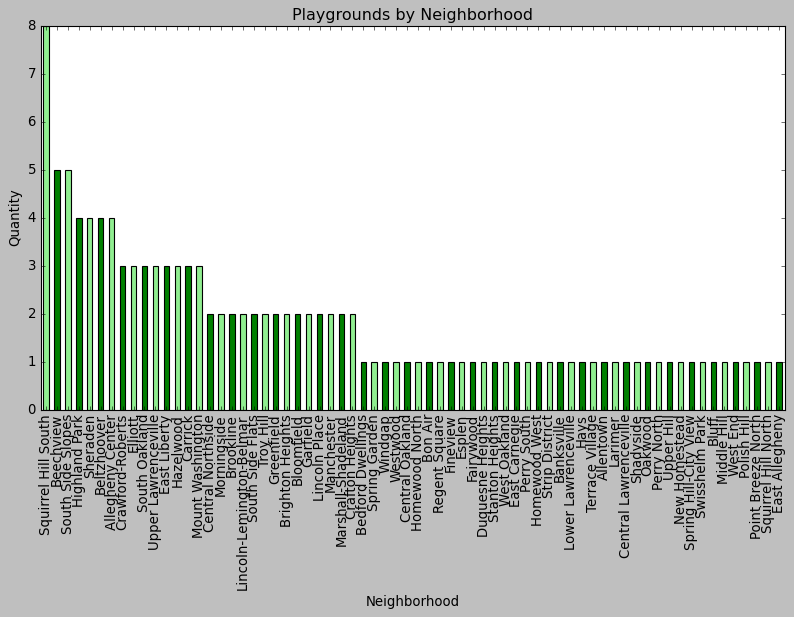

In [10]:
df = pd.read_csv("datasets/pitt-playgrounds.csv")
playgrounds = df["neighborhood"].value_counts()
samm = playgrounds
playgrounds.plot.bar(
    figsize=(12, 6),
    title="Playgrounds by Neighborhood",
    xlabel="Neighborhood",
    ylabel="Quantity",
    color=["lightgreen", "green"],
    rot=90
)
plt.show()

Public playgrounds have proven to be important for child development, allowing them to socialize in a safe space other than at school. They increase physical activity, and have positive effects on social and mental health. Playgrounds also provide spaces for parents to socialize and alliviate some of the stress of watching their children, improving their quality of life as well.

From our data, we can see that the "best" neighborhood according to this particular sub-metric is **Squirrel Hill South**, with 8 playgrounds. Beechview and South Side Slopes are tied for second with 5 playgrounds each.

#### **Sam G - Poverty Rate**

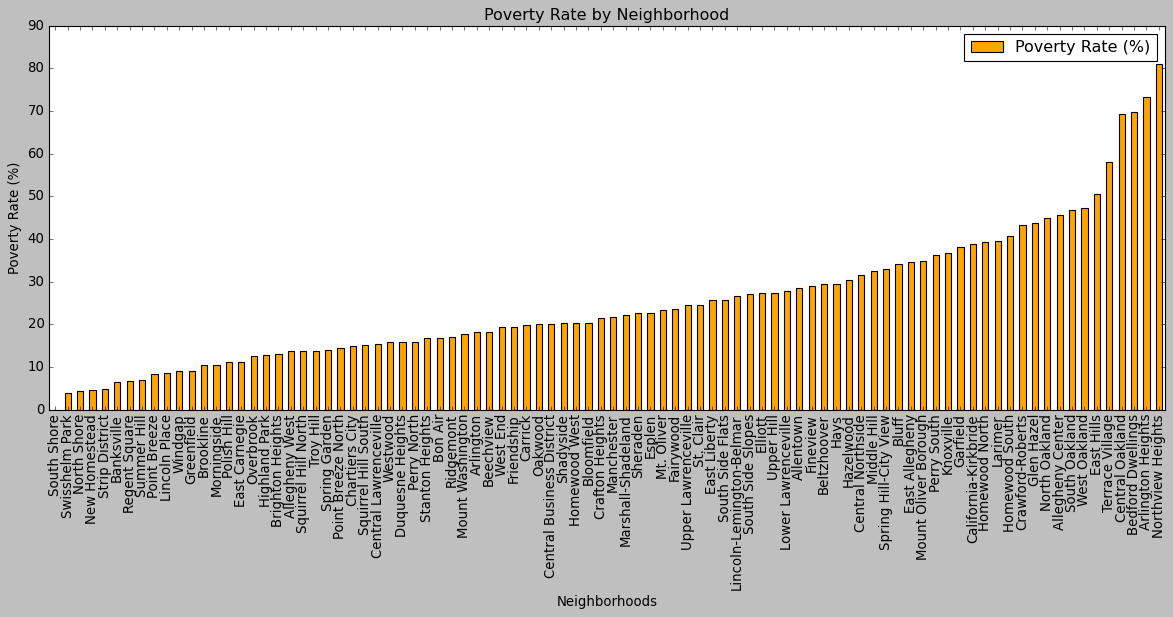

In [7]:
poverty = pd.read_csv("datasets/poverty-status-of-individuals-in-the-past-12-months-by-living-arrangement.csv")
povertyRate = poverty["Estimate; Income in the past 12 months below poverty level:"]/poverty["Estimate; Total:"]
neighborhoods = poverty["Neighborhood"]
povertyRatePerNeighborhood = {'Neighborhoods': neighborhoods,'Poverty Rate (%)': povertyRate}
df = pd.DataFrame(povertyRatePerNeighborhood)
df = df.sort_values("Poverty Rate (%)")
df = df.nsmallest(n=90, columns = "Poverty Rate (%)")
df["Poverty Rate (%)"] = df["Poverty Rate (%)"]*100
plt.style.use('classic')
samg = df
df.plot(kind="bar",
        x="Neighborhoods",
        y="Poverty Rate (%)", 
        title="Poverty Rate by Neighborhood",
        figsize=(18,6), 
        rot = 90,
        color = 'orange')
plt.xlabel("Neighborhoods")
plt.ylabel("Poverty Rate (%)")
plt.show()

Using solely this data/submetric, we can conclude that **South Shore** is the best neighborhood in Pittsburgh. Poverty in a city can lead to greater crime and an overall lower quality of life; a city where there are no impoverished families should correlate to less crime, and an overall happier environment.

## **The Best Neighborhood** ##

##### Given:
- Police incidents  = $P$
- Poverty Rate = $R$
- Median Home Value = $M$
- Park Acres = $G$
- Playgrounds = $S$

$1(1-R)+.8(1-(\frac{1}{\log_{10}(20000)})(\log_{10}(P+1)))+.5((\frac{1}{\sqrt[3](200)})(\sqrt[3](G)))+.5((\frac{1}{\log_{10}(35)})(\log_{10}(\frac{M}{10000})))+.2(\log_{9}(S+1))$

##### Explanation of formula:
To start, we created an equation for each sub-metric that resulted in a value from 0 to 1 for all the neighborhoods. The better each neighborhood performed in each sub-metric, the higher the value the algorithm yielded. 

For example, all neighborhoods had between 0 and 8 playgrounds, and the 8 playground neighborhood was the best for that particular sub-metric. Therefore we determined that the 8 playground neighborhood should yield a value of 1 and any 0 playground neighborhoods should yield a value of 0, with the others falling in between.

This process was repeated for all 5 of our sub-metrics, with the "best" neighborhood (or, when possible, the theoretical "perfect" neighborhood) scoring 1 and worse neighborhoods scoring lower.

For these individual algorithms, we primarily used logarithmic equations for their growth rate, reasoning that our sub-metrics should have diminishing returns. For example, the difference between a 1 playground neighborhood and a 0 playground neighborhood should be much greater than that between an 8 playground neighborhood and a 7 playground neighborhood. Park acres used a cube root function instead because of its shallower slope, and poverty rate simply used a linear shape.

To merge these individual algorithms into one big algorithm, we simply added the values together and added numerical weights depending on our sub-metric hierarchy. We used the following weights:
- Poverty Rate: 1
- Police Incidents: 0.8
- Median Home Value: 0.5
- Park Acres: 0.5
- Playgrounds: 0.2

When added together, this scores all neighborhoods on a scale from 0 to 3, where a theoretical "perfect" neighborhood will yield a value of 3. As a result, the best neighborhoods will have the highest score on this scale, according to our metric.

In [8]:
# Poverty Rate
samg["Formula"]=(100-samg["Poverty Rate (%)"])/100
# Police Incidents
ethan=.8*(1-((1/math.log10(20000))*(np.log10(ethan+1))))
# Park Acres
james1["Formula"]=.5*((1/math.pow(200,1/3)))
# Median Home Value
james2["Formula"]=.5*((1/math.log10(35))*(np.log10(james2["Median Home Value ($ Ten Thousands)"])))
# Playground
samm=.2*(np.emath.logn(9,samm+1))
samm=pd.DataFrame(samm)
#samg

#ethan
#james1
#james2
samm


,0
0,0.200000
1,0.163093
2,0.163093
3,0.146497
4,0.146497
...,...
63,0.063093
64,0.063093
65,0.063093
66,0.063093


## **Conclusions** ##